In [56]:
function gen_signal!(contaiter, time_domain, modfreq, auxfreq)
    c1 = 2pi * modfreq
    c2 = auxfreq * 2pi
    for (i, t) in enumerate(time_domain)
        @inbounds contaiter[i] = sin(t * c1) < 0.7 ? 0 : (sin(t * c2) > 0.7 ? 1 : 0)
    end
end

function gen_signal(time_domain, modfreq, auxfreq)
    return [sin(t * 2pi * modfreq) < 0.7 ? 0 : (sin(t * auxfreq * 2pi) > 0.7 ? 1 : 0) for t in time_domain]
end

function gen_signal_bl(time_domain, modfreq, auxfreq)
    return (sin.(time_domain *. 2pi * modfreq) >. 0.7) *. (sin(time_domain *. auxfreq * 2pi) >. 0.7)
end

LoadError: syntax: invalid identifier name "."

  0.000202 seconds
  0.000264 seconds (2 allocations: 78.266 KiB)
  0.000312 seconds (1 allocation: 9.938 KiB)


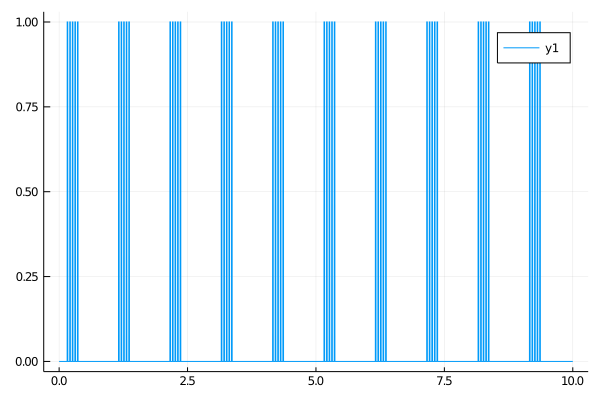

In [55]:
using Plots
td = 0:0.001:10
y = zero(td)
@time gen_signal!(y, td, 1, 20)
@time res = gen_signal(td, 1, 20)
@time res = gen_signal_bl(td, 1, 20)
plot(td , y)

In [2]:
mutable struct analizer
    time::Real
    score::Complex
    smooth_score::Complex
    low_pass_const::Real

    freq::Real
end

function f(a::analizer, t, val)
    a.score += val * (cos(t * a.freq * 2pi) - im * sin(t * a.freq * 2pi))
    #a.smooth_score = a.smooth_score + a.low_pass_const * (abs(a.score) - a.smooth_score)
    return a.score
end

f (generic function with 1 method)

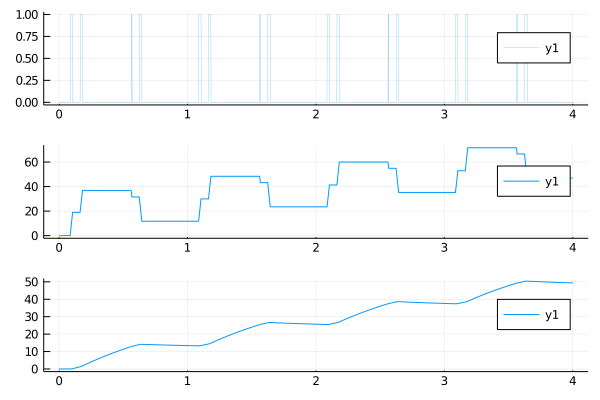

In [63]:
using Plots
ENV["GKS_ENCODING"]="utf8"
gr()

a = analizer(0, 0, 0, 0.001, 1)

time_domain = 0:0.001:4
signal = gen_signal(time_domain, 2, 13)

arr = []
sarr = []

for (t, y) in zip(time_domain, signal)
   f(a, t, y)
    append!(arr, a.score)
    append!(sarr, a.smooth_score)
end


sig_plot = plot(time_domain, signal, linewidth=.2)
acc_plot = plot(time_domain, abs.(arr))
smooth_acc_plot = plot(time_domain, abs.(sarr))

plot(sig_plot, acc_plot, smooth_acc_plot, layout=(3, 1))
#savefig("1.png")

In [25]:
using Plots
plotly()

function test(mfreq, a)
    a.score = 0
    gen_signal(signal, time_domain, mfreq, 3)
    
    arr = [f(a, t, y) for (t, y) in zip(time_domain, signal)]
    
    return maximum(abs.(arr))
end
time_domain = 0:0.001:10
signal = zeros(length(time_domain))

mfreqd = 0:0.01:3
response = []
a = analizer(0, 0, 0, 0.001, 1)

@time for mfreq in mfreqd
    
end

plot(mfreqd, response)
vline!([1])

  0.006980 seconds (602 allocations: 14.109 KiB)


┌ Warning: Keyword argument letter not supported with Plots.PlotlyBackend().  Choose from: Set([:zforeground_color_guide, :top_margin, :group, :background_color, :yforeground_color_text, :yguidefontcolor, :seriesalpha, :legendfontcolor, :seriescolor, :ztick_direction, :zlims, :normalize, :linestyle, :xflip, :yforeground_color_guide, :fillcolor, :ygrid, :background_color_inside, :bins, :markerstrokestyle, :yscale, :clims, :xtickfontcolor, :xguide, :fillalpha, :tick_direction, :yguidefontsize, :legendfontfamily, :hover, :foreground_color, :x, :legend, :discrete_values, :ytick_direction, :ribbon, :xdiscrete_values, :orientation, :markersize, :camera, :xforeground_color_grid, :quiver, :zticks, :markerstrokecolor, :xtickfontsize, :levels, :foreground_color_border, :marker_z, :markerstrokealpha, :markeralpha, :zguidefontcolor, :ygridlinewidth, :zlink, :zscale, :smooth, :xticks, :zguidefontsize, :y, :margin, :ytickfontcolor, :title_location, :yforeground_color_border, :zguidefontfamily, :zgri

BoundsError: BoundsError: attempt to access 0-element Array{Float64,1} at index [1:301]

In [16]:
as, df = (1, 2)
as

1